## **Reinforced Logo**

### **Contexto**

Logo es un lenguaje de programación creado por Seymour Papert y Wallace Feurzeig en 1966. Se trata de un lenguaje concebido con fines educativos que se usa para introducir nociones básicas de algorítmica a niños en cursos tempranos de educación primaria. 

El principio de Logo se basa en una tortuga que se controla a partir de instrucciones simples de movimiento —avanzar, girar a la derecha o izquierda, retroceder, etc.—.  La tortuga deja un trazo sobre el plano sobre el que se mueve. El objetivo es entonces enseñarle al niño a programar mientras dibuja. 

### **Objetivo**

El objetivo del proyecto es enseñarle a Logo a dibujar **figuras rectangulares**. En particular, a lo largo de este documento presentaremos una solución para enseñarle a Logo a dibujar dos figuras: un cuadrado simple, y un caracol cuadrado como se ve en las imágenes a continuación.

### Entrenamiento

Ejecute la implementación del agente de q-learning con el mapa de gridworld dado a continuación. Para crear el ambiente de gridworld, es necesario darle por parámetro.

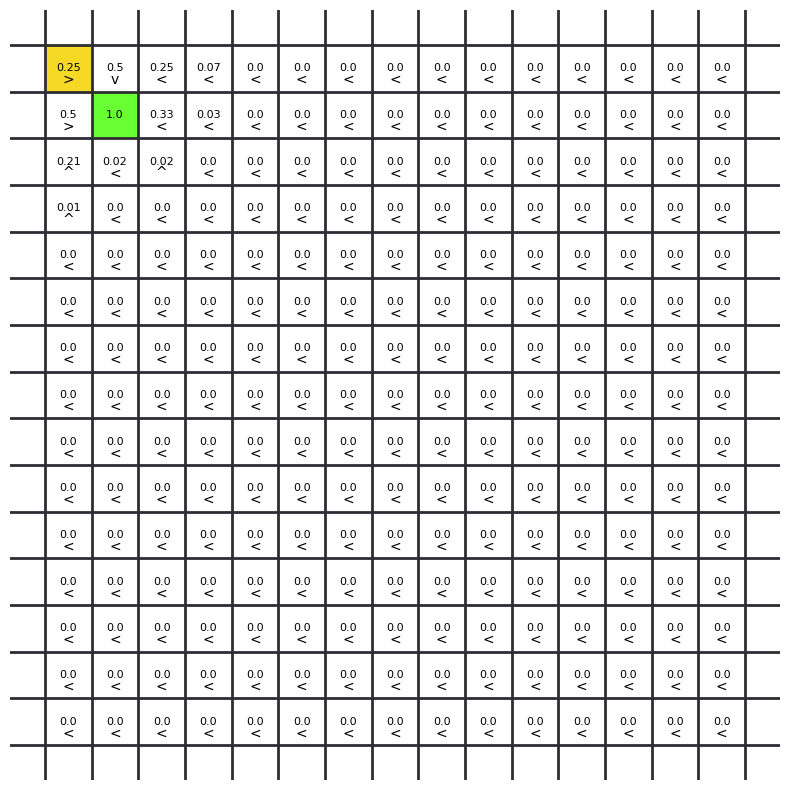

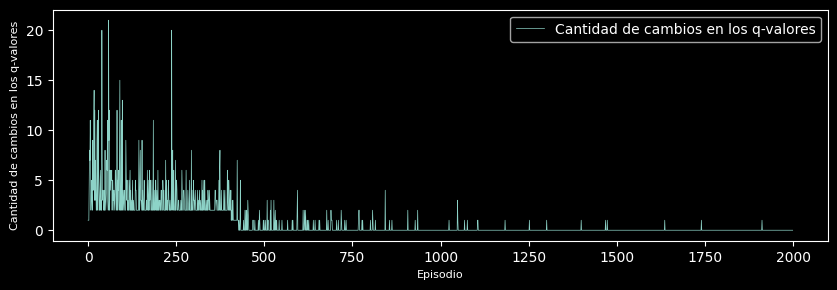

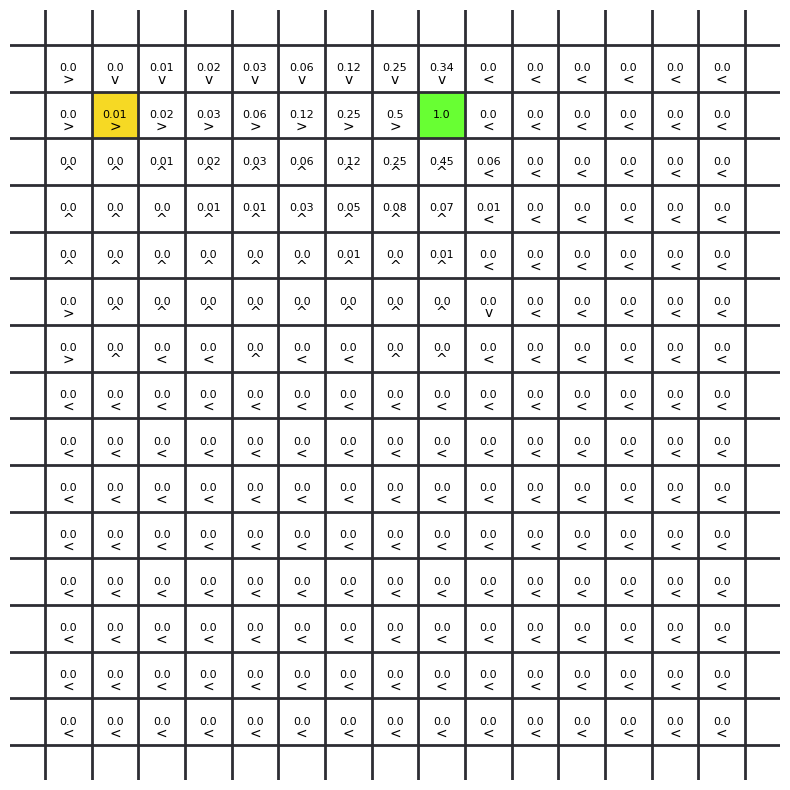

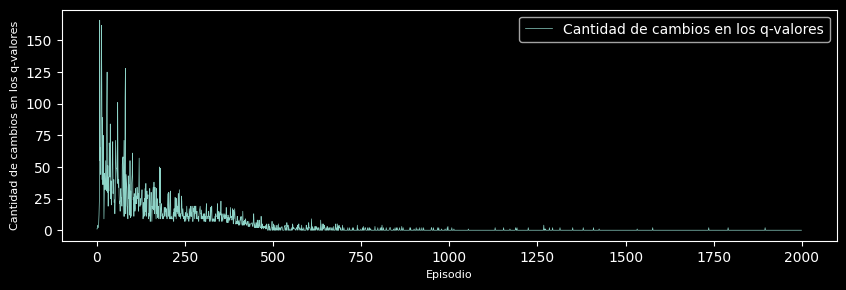

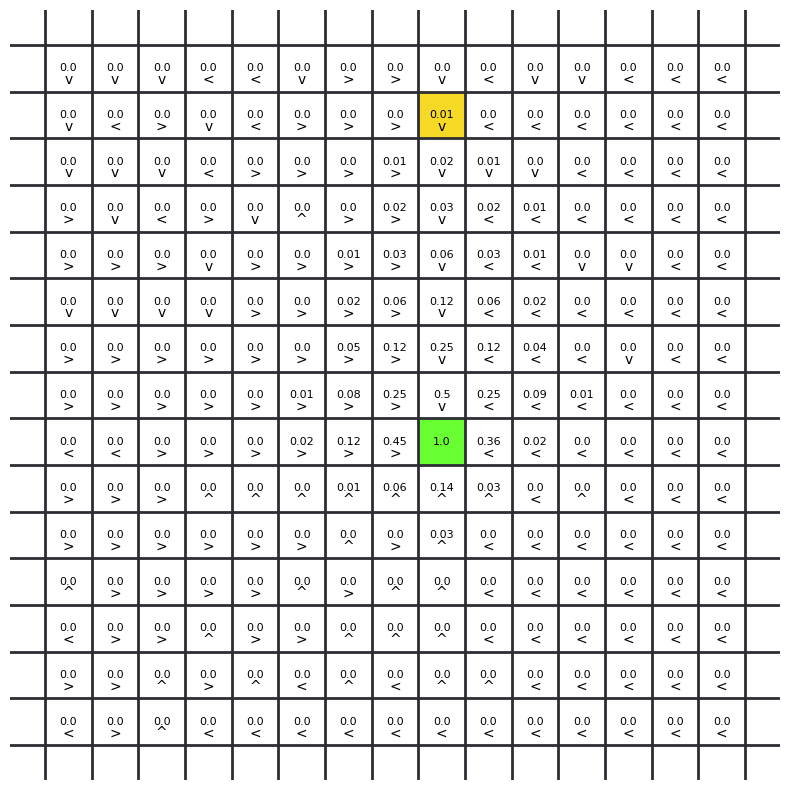

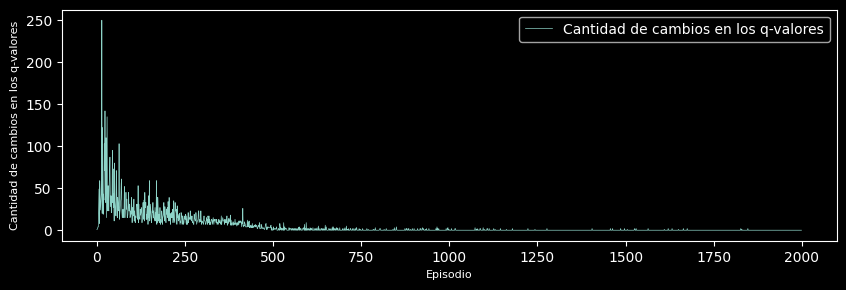

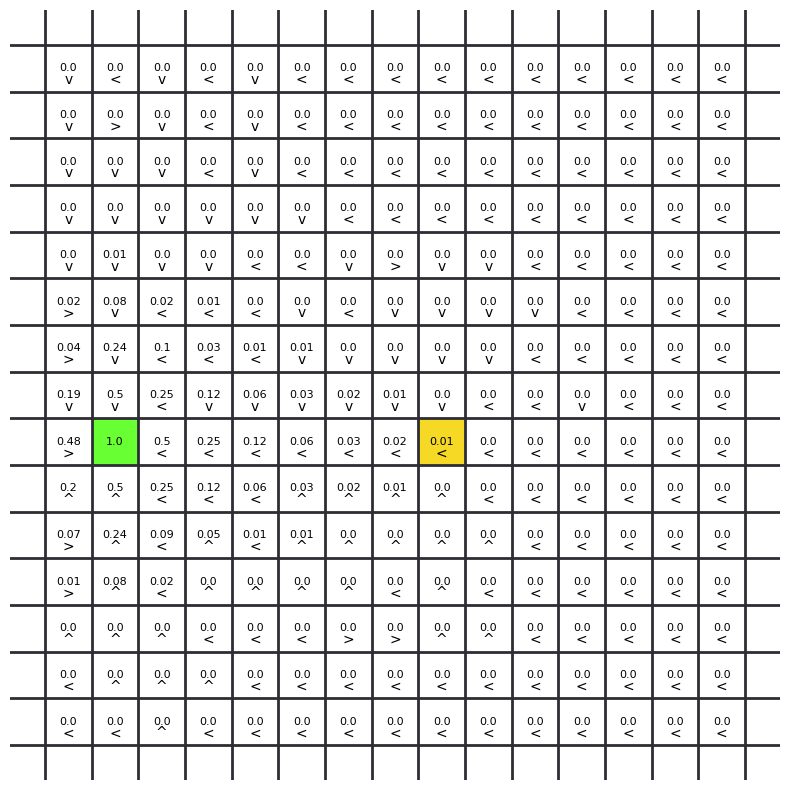

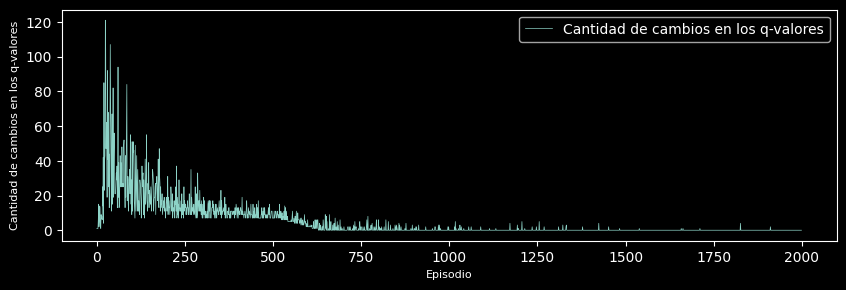

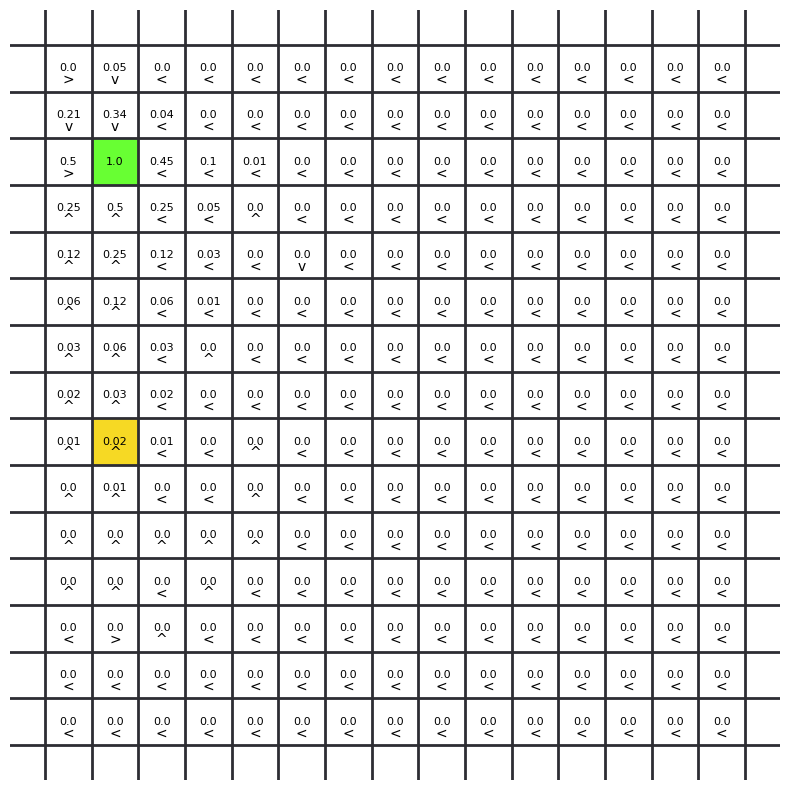

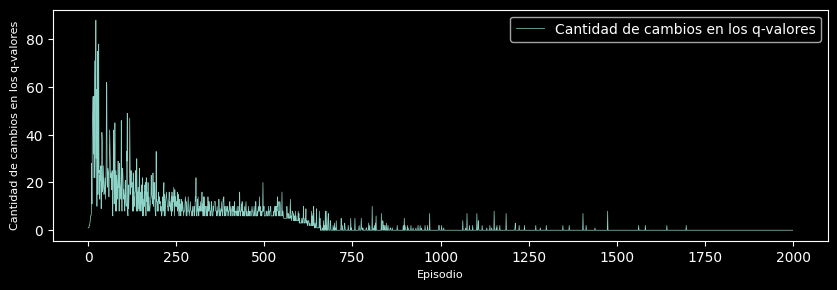

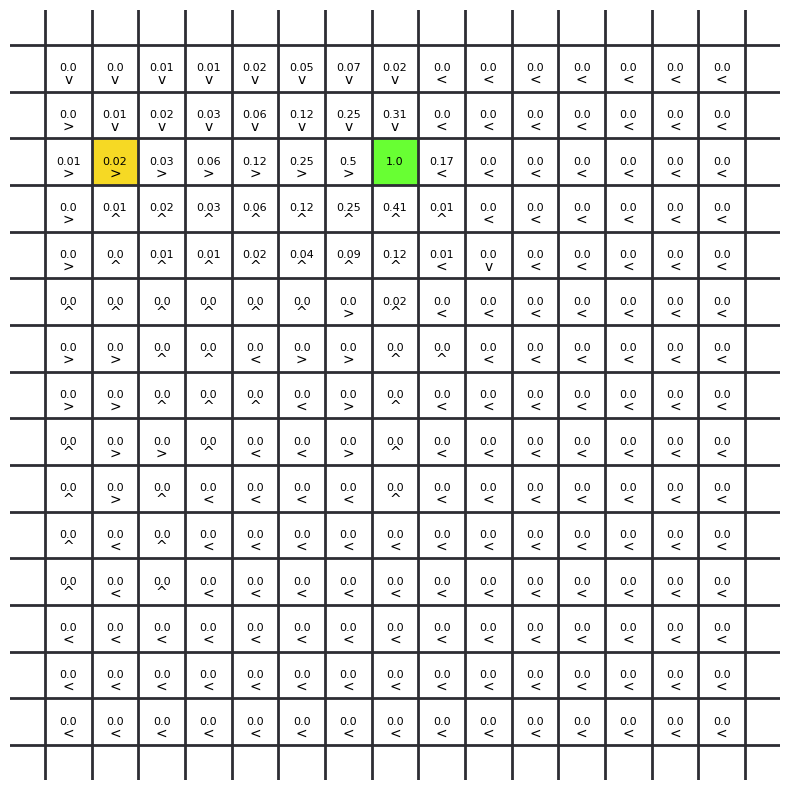

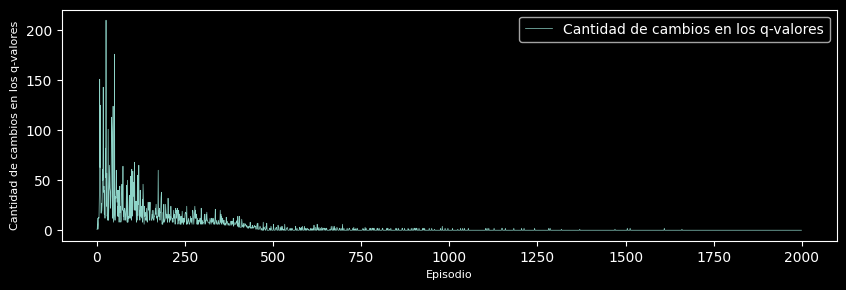

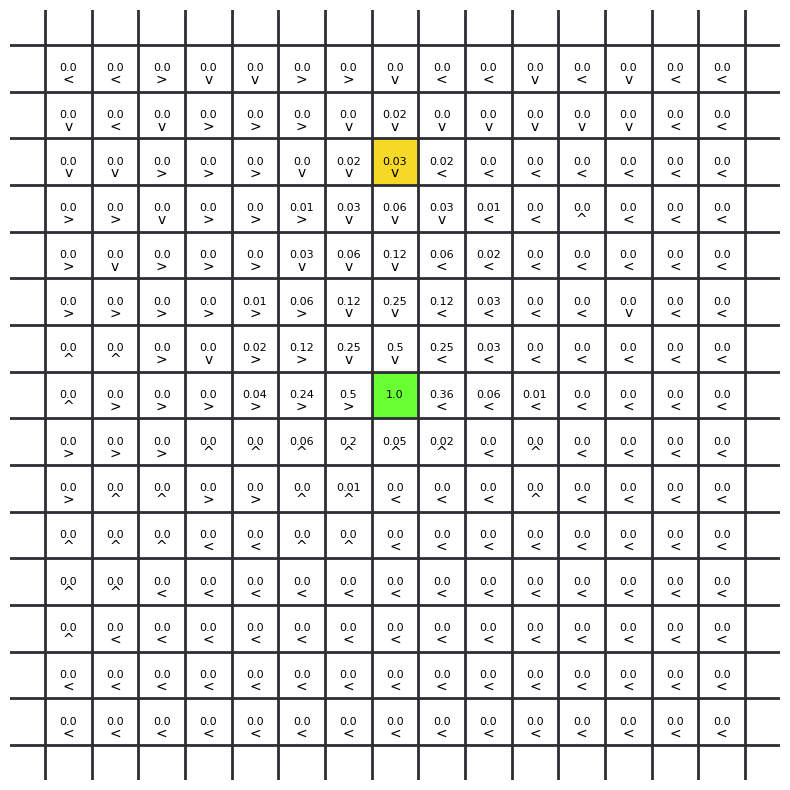

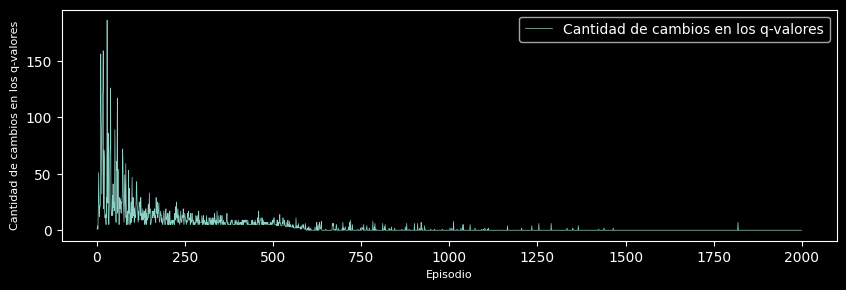

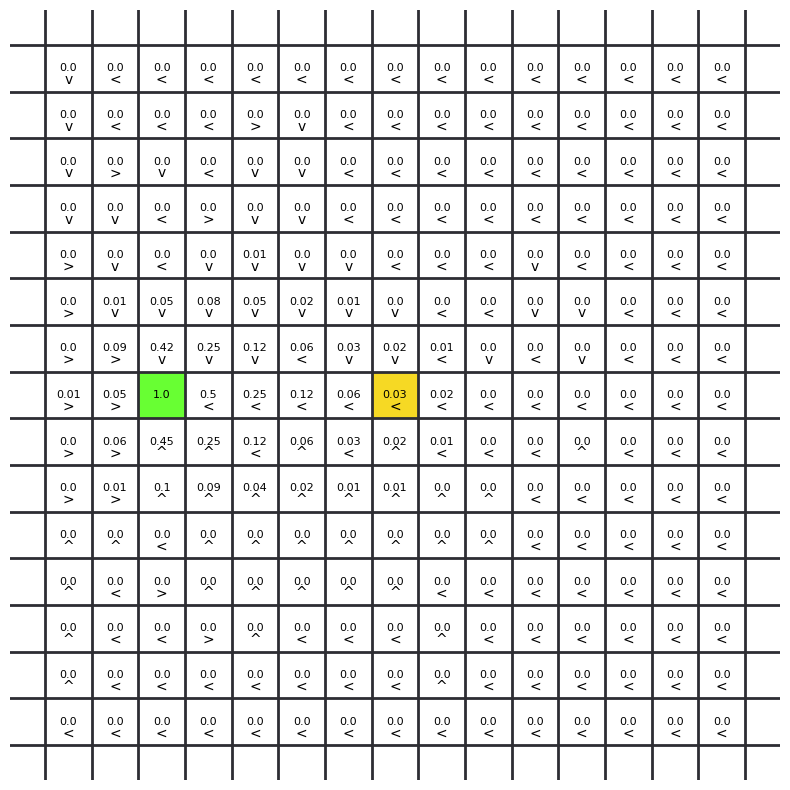

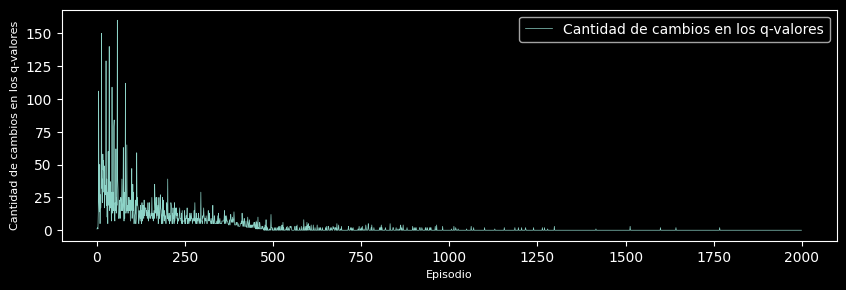

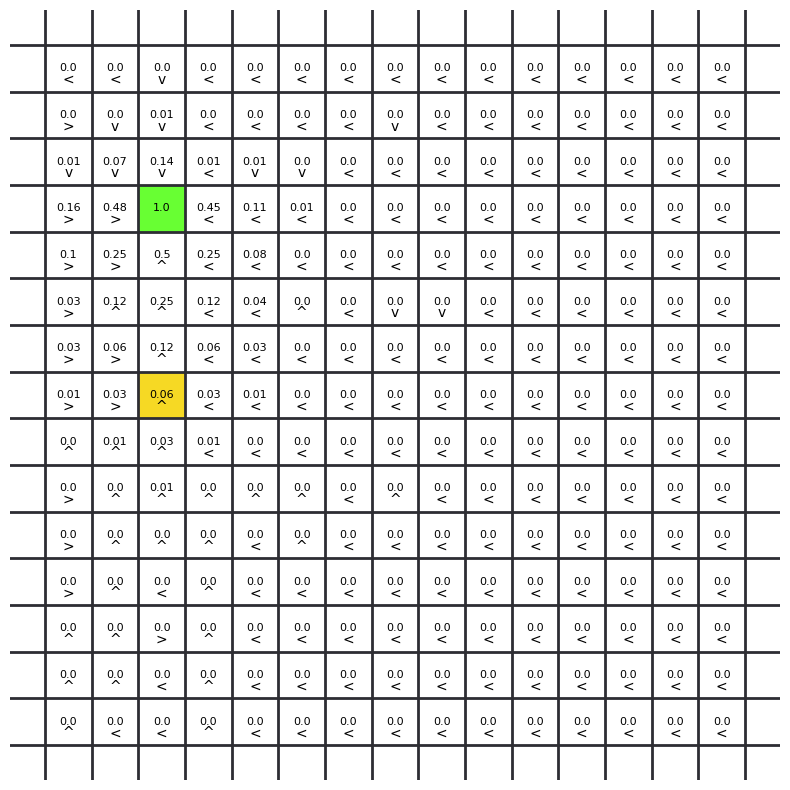

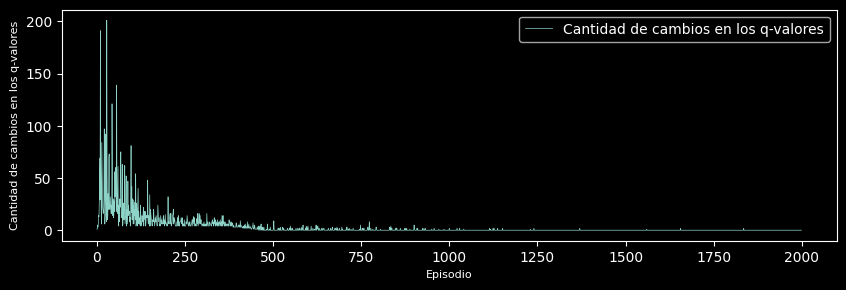

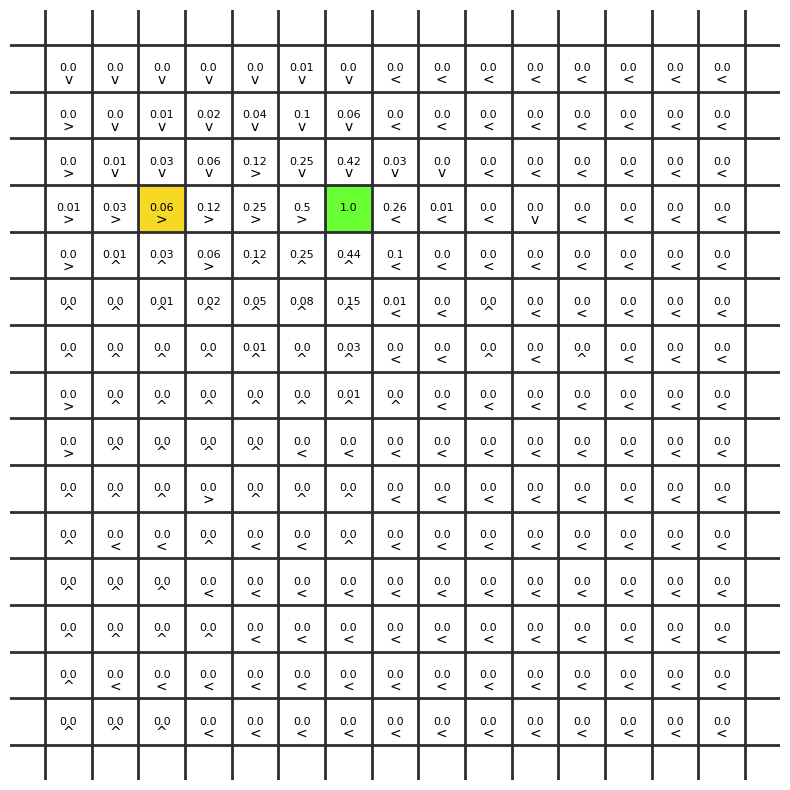

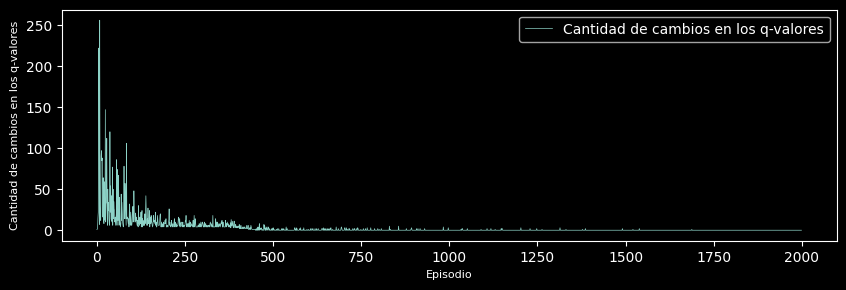

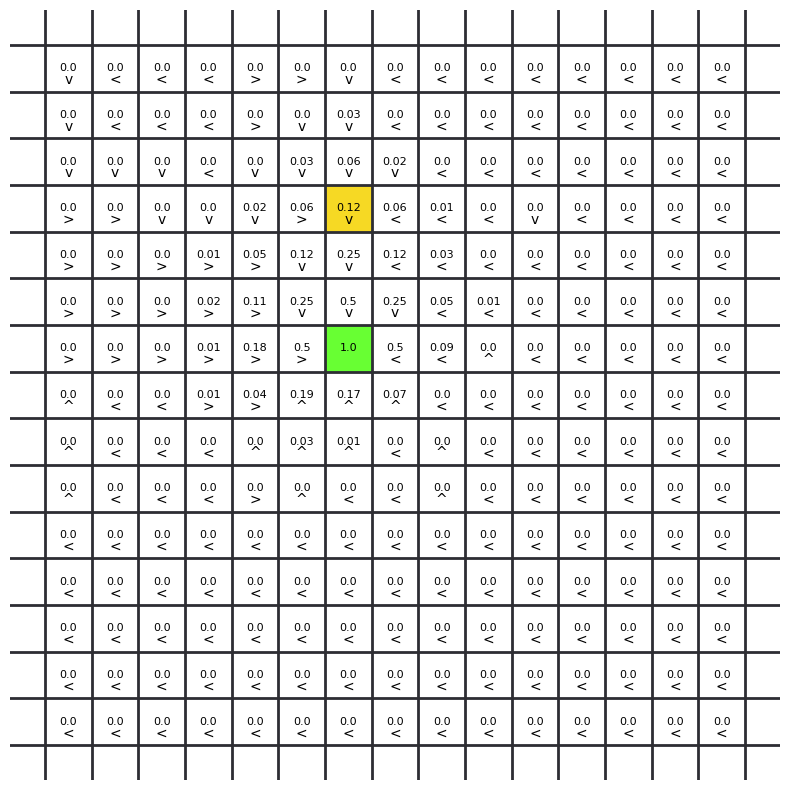

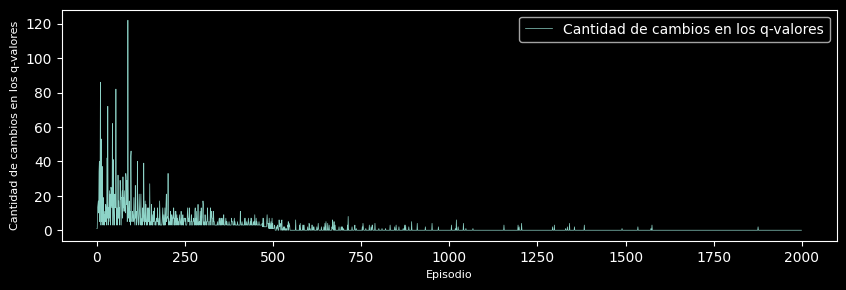

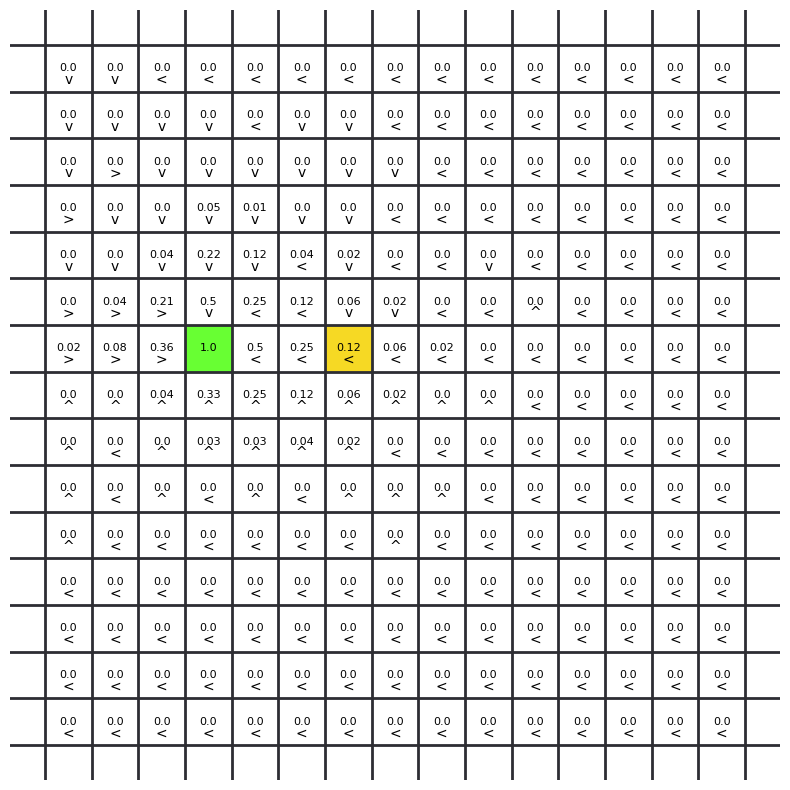

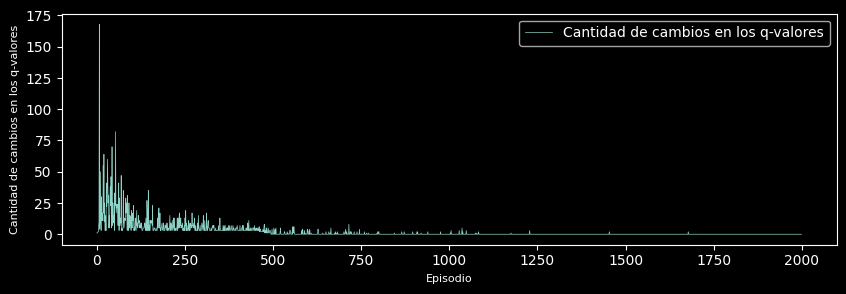

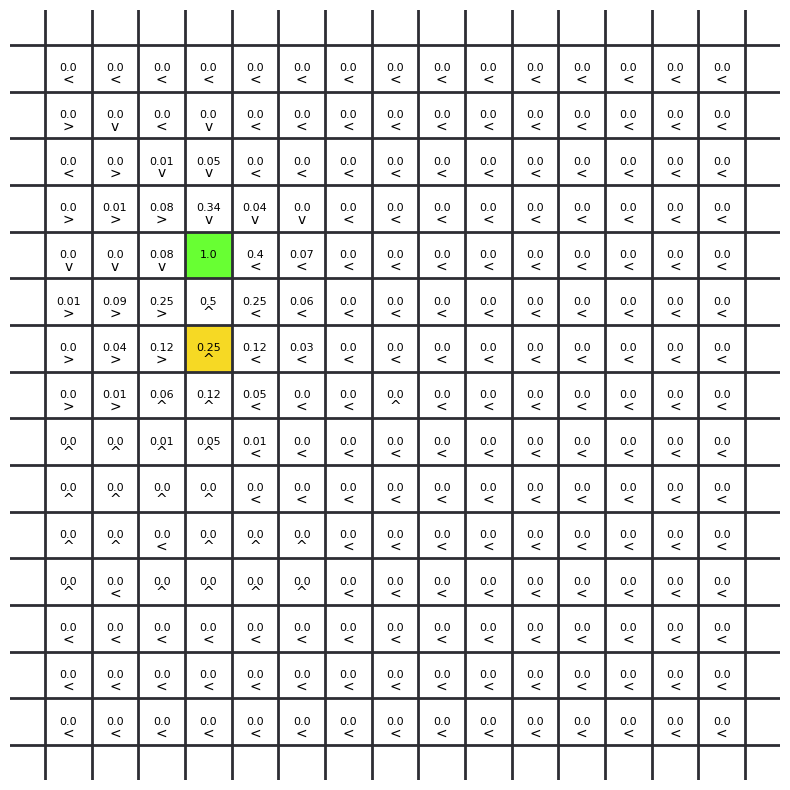

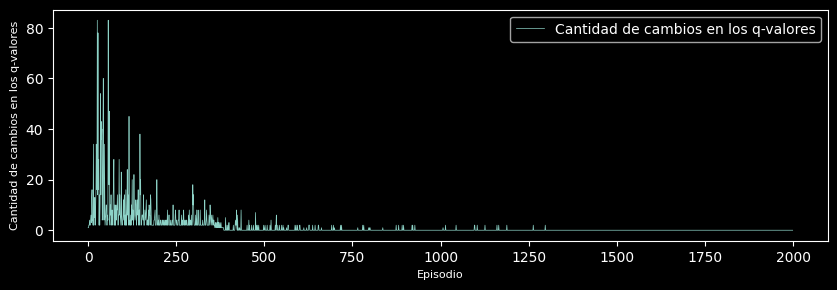

In [1]:
%run environment.ipynb
%run agent.ipynb
%run rewards.ipynb

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import matplotlib.pyplot as plt
random.seed(5)

def train(rewards_system):

    agents = []
    for board in rewards_system:
        env = Environment(board)
        agent = Agent(env, gamma=0.5, alpha=0.1, epsilon=0.9, episodes=2000)
        stats = agent.run()
        actions, values = agent.actions_values()
        env.plot_action(actions, values)

        with plt.style.context('dark_background'): 
            stats.plot(x="Episodio", y="Cantidad de cambios en los q-valores", linewidth=0.5, figsize=(10, 3))
            plt.xlabel("Episodio",  size = 8)
            plt.ylabel("Cantidad de cambios en los q-valores", size = 8)

        agents += [agent, ]

    return agents


rewards_system = Rewards().square(size=Size.L)
#rewards_system = Rewards().snail(size=Size.L)
agents = train(rewards_system)

In [2]:
import turtle 

class Logo:

    def __init__(self, step_size=5, draw_rewards_only=False):

        # Configuración de la tortuga y de la pantalla
        self._turtle = turtle.Turtle()
        self._turtle.penup()
        self._turtle.speed(30)
        self._turtle.left(90)
        self._turtle.pencolor("yellow")
        self._screen = turtle.Screen()
        self._screen.bgcolor("black")
        self.draw_rewards_only = draw_rewards_only
        self.step_size = step_size
        self._turtle.penup()

    
    def logo_coordinates(self, position):
        '''
        El sistema de coordenadas de la tortuga no es el mismo que el sistema de
        coordenadas del canvas. Mientras que la tortuga se mueve sobre un sistema
        cartesiano donde el origen está en el punto inferior izquerdo, el canvas
        inicia en el punto superior izquerdo. 
        
        Esto es porque el canvas esta representado
        como una matriz de python, la primera fila es la fila superior mientras que
        la primera columna es la de más a la izquirda. 
        
        Además, el canvas representa estados mientras que la posición de la tortuga
        debe tener en cuenta la distancia entre los estados que está definida por el 
        tamaño del paso. 

        Este método se encarga de hacer la transformación. Recibe como parámetro una
        coordenada en el sistema matricial (del canvas) y retorna la coordenada 
        correspondiente en el sistema cartesiado (usado por logo).
        '''
        i, j = position
        x = j * self.step_size
        y = i * self.step_size * -1
        return x, y
    

    def down(self):
        '''
        Mueve la torguga hacia abajo tantas unidades en self.step_size
        Si la posición de llegada de este movimiento tiene una recompensa,
        entonces la tortuga baja el lápiz para dibujar.
        '''
        self._turtle.right(180)
        self._turtle.forward(self.step_size)
        self._turtle.left(180)


    def up(self):
        '''
        Mueve la torguga hacia arriba tantas unidades en self.step_size
        Si la posición de llegada de este movimiento tiene una recompensa,
        entonces la tortuga baja el lápiz para dibujar.
        '''
        self._turtle.forward(self.step_size)
        

    def left(self):
        '''
        Mueve la torguga hacia la izquierda tantas unidades en self.step_size
        Si la posición de llegada de este movimiento tiene una recompensa,
        entonces la tortuga baja el lápiz para dibujar.
        '''
        self._turtle.left(90)
        self._turtle.forward(self.step_size)
        self._turtle.right(90)


    def right(self):
        '''
        Mueve la torguga hacia la derecha tantas unidades en self.step_size
        Si la posición de llegada de este movimiento tiene una recompensa,
        entonces la tortuga baja el lápiz para dibujar.
        '''
        self._turtle.right(90)
        self._turtle.forward(self.step_size)
        self._turtle.left(90)
        

    def go_to(self, position, draw=False):
        '''
        Este método hace que la tortuga salte hacia una posición diferente de la actual.
        El salto puede dejar trazo o no dependiendo del valor del parámetro 'draw'.
        '''
        logo_target = self.logo_coordinates(position)
        self._turtle.goto(logo_target[0], logo_target[1])


    
    def draw(self, agent, iterations=15, state=(0, 0), collision_strategy='stop', ignore_terminals=True):
        '''
        Este método usa la política en el agente para dibujar. El algoritmo de dibujo se basa en iteraciones, 
        cada iteración da un paso desde el estado actual en la dirección dictada por la política. 
        En algunos casos hay colisiones y es necesario desobedecer la política y saltar a otro lugar del tablero para 
        evitar ciclos infinitos. 

        Entradas:
        -----------

        - collision_strategy: Estrategia que se debe seguir en caso de colisiones. Dos opciones son posibles:
        'stop' que detiene la ejecución saliendo del ciclo de dibujo y del método, y 'jump' que hace que la tortuga
        salte a un punto aleatorio del tablero. 

        - ignore_terminals: Ignora el movimiento dictado por la política en un estado terminal. Esos movimientos
        no nos interesan cuando estamos calculando un trazo porque el estado terminal no debe cambiar dado que es el
        estado inicial de la siguiente iteración.
        '''
        pivot_state = agent.environment.initial_state
        print(f'Inicio un trazo en el estado: {agent.environment.initial_state}')
        actions, values = agent.actions_values()
        done = False
        while not done:            
            policy = actions[pivot_state]
            if policy == 'down':
                self.down()
            if policy == 'up':
                self.up()
            if policy == 'left':
                self.left()
            if policy == 'right':
                self.right()

            reward, new_state, done = agent.environment.do_action(policy)
            pivot_state = new_state
            


In [3]:
logo = Logo(step_size=15)

initial_trace = True
for agent in agents:
    if initial_trace:
        logo._turtle.penup()
    else:
        logo._turtle.pendown()
    logo.draw(agent=agent)
    initial_trace = False

2024-05-27 19:41:24.889 Python[50147:28352117] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


Inicio un trazo en el estado: (0, 0)
Inicio un trazo en el estado: (1, 1)
Inicio un trazo en el estado: (1, 8)
Inicio un trazo en el estado: (8, 8)
Inicio un trazo en el estado: (8, 1)
Inicio un trazo en el estado: (2, 1)
Inicio un trazo en el estado: (2, 7)
Inicio un trazo en el estado: (7, 7)
Inicio un trazo en el estado: (7, 2)
Inicio un trazo en el estado: (3, 2)
Inicio un trazo en el estado: (3, 6)
Inicio un trazo en el estado: (6, 6)
Inicio un trazo en el estado: (6, 3)
